## Data: https://www.kaggle.com/abecklas/fifa-world-cup

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats as stats
%matplotlib inline

In [2]:
match = pd.read_csv('WorldCupMatches.csv')

In [3]:
match.head(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,2000.0,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA


In [4]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [5]:
match.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


# 前期数据处理 

In [6]:
match['Goal Difference'] = np.abs(match['Home Team Goals'] - match['Away Team Goals'])

In [7]:
match['Half-time Goal Difference'] = np.abs(match['Half-time Home Goals'] - match['Half-time Away Goals'])

In [8]:
match['Goal total'] = match['Home Team Goals'] + match['Away Team Goals']

In [9]:
def function(col):
    if col > 1:
        return 1
    else:
        return 0

In [10]:
match['big_dfference'] = match['Goal Difference'].apply(lambda x : function(x))

In [11]:
# function to get unique values 
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    # print list 
    for x in unique_list: 
        print (x)

In [12]:
print(unique(match['Home Team Name']))

France
USA
Yugoslavia
Romania
Argentina
Chile
Uruguay
Brazil
Paraguay
Austria
Hungary
Switzerland
Sweden
Germany
Spain
Italy
Czechoslovakia
Cuba
England
Germany FR
Turkey
Soviet Union
Northern Ireland
Mexico
Wales
Portugal
Korea DPR
Peru
Belgium
Bulgaria
German DR
Zaire
Poland
Australia
Scotland
Netherlands
Haiti
Tunisia
Algeria
Honduras
Canada
Morocco
Korea Republic
Iraq
Denmark
rn">United Arab Emirates
Costa Rica
Cameroon
rn">Republic of Ireland
Colombia
Norway
Nigeria
Saudi Arabia
Bolivia
Russia
Greece
Jamaica
South Africa
Japan
Croatia
China PR
Senegal
Slovenia
Ecuador
rn">Trinidad and Tobago
rn">Serbia and Montenegro
Angola
Czech Republic
Togo
Iran
C�te d'Ivoire
Ghana
Ukraine
Serbia
New Zealand
Slovakia
IR Iran
rn">Bosnia and Herzegovina
nan
None


In [13]:
print(unique(match['Away Team Name']))

Mexico
Belgium
Brazil
Peru
France
Bolivia
Paraguay
Romania
Chile
USA
Yugoslavia
Argentina
Egypt
Netherlands
Switzerland
Sweden
Spain
Hungary
Austria
Germany
Czechoslovakia
Dutch East Indies
Norway
Poland
Cuba
Italy
England
Scotland
Turkey
Korea Republic
Germany FR
Uruguay
Wales
Northern Ireland
Soviet Union
Colombia
Bulgaria
Korea DPR
Portugal
Israel
Morocco
El Salvador
Australia
Haiti
German DR
Zaire
IR Iran
Tunisia
Iran
Cameroon
New Zealand
Algeria
Honduras
Kuwait
Iraq
Denmark
Canada
rn">Republic of Ireland
rn">United Arab Emirates
Costa Rica
Saudi Arabia
Russia
Greece
Nigeria
South Africa
Japan
Croatia
Jamaica
Senegal
Slovenia
Ecuador
China PR
C�te d'Ivoire
Czech Republic
Ghana
Togo
Ukraine
rn">Trinidad and Tobago
rn">Serbia and Montenegro
Angola
Slovakia
Serbia
rn">Bosnia and Herzegovina
nan
None


In [14]:
euro = ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria'
        ,'Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Hungary'
        ,'Iceland','Ireland','Italy','Kazakhstan','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Malta','Moldova'
        ,'Monaco','Montenegro','Netherlands','North Macedonia','Norway','Poland','Portugal','Romania','Russia'
        ,'San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Turkey','Ukraine','Vatican City '
        ,'Yugoslavia','Czechoslovakia','England','Scotland','Germany FR','Northern Ireland','Wales','Soviet Union']


In [15]:
asia_oseania = ['Afghanistan','Armenia','Azerbaijan','Bahrain','Bangladesh','Bhutan','Brunei','Cambodia','China',
                'Cyprus','Georgia','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','Kuwait',
                'Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea','Oman',
                'Pakistan','Palestine','Philippines','Qatar','Russia','Saudi Arabia','Singapore','South Korea','Sri Lanka',
                'Syria','Taiwan','Tajikistan','Timor-Leste','Turkey','Turkmenistan','rn">United Arab Emirates',
                'Uzbekistan','Vietnam','Yemen','Australia','Fiji','Kiribati','Marshall Islands','Micronesia',
                'Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu',
                'Dutch East Indies','Korea Republic','Korea DPR','IR Iran','China PR']

In [16]:
africa = ['Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cabo Verde','Cameroon','Central African Republic ',
          'Chad','Comoros','Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Eswatini ','Ethiopia','Gabon',
          'Gambia','Ghana','Guinea','Guinea-Bissau','Kenya',
          'Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique',
          'Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia',
          'South Africa','South Sudan','Sudan','Tanzania','Tunisia','Togo','Uganda','Zambia','Zimbabwe','Zaire',"C�te d'Ivoire"]


In [17]:
north_am = ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic',
            'El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama',
            'Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','USA']

In [18]:
south_am = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana',
            'Paraguay','Peru','Suriname','Uruguay','Venezuela']

In [19]:
def con(p):
    if p in euro:
        return 1
    elif p in asia_oseania:
        return 2
    elif p in africa:
        return 3
    elif p in north_am:
        return 4
    elif p in south_am:
        return 5
    else:
        return 0

In [20]:
match['home_team'] = match['Home Team Name'].apply(lambda x : con(x))

In [21]:
match['away_team'] = match['Away Team Name'].apply(lambda x : con(x))

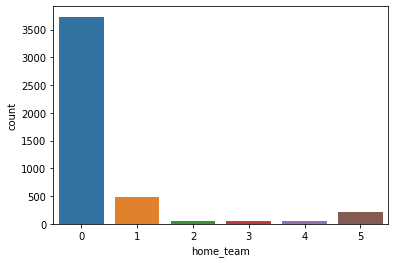

In [22]:
sns.countplot(match['home_team'])

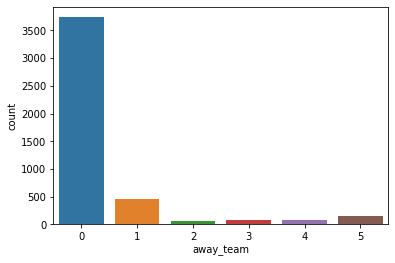

In [23]:
sns.countplot(match['away_team'])

In [24]:
print(unique(match['Stage']))

Group 1
Group 4
Group 2
Group 3
Semi-finals
Final
Preliminary round
Quarter-finals
Match for third place
First round
Group 6
Group B
Group A
Group 5
Group C
Group D
Group F
Group E
Round of 16
Group H
Group G
Third place
Play-off for third place
nan
None


In [25]:
def s(i):
    if i in(['Preliminary round','nan','None']):
        return 0
    elif i in (['First round','Group 1','Group 2','Group 3','Group 4','Group 5','Group 6','Group A','Group B','Group C',
               'Group D','Group E','Group F','Group H','Group G']):
        return 1
    elif i in(['Quarter-finals','Round of 16','Semi-finals','Third place','Play-off for third place','Match for third place']):
        return 2
    else:# Final
        return 3

In [26]:
match['stage'] = match['Stage'].apply(lambda x: s(x))

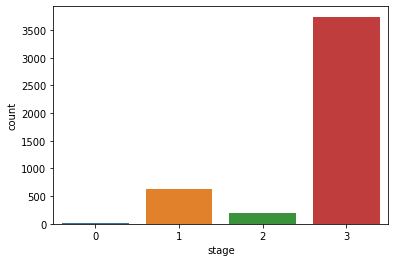

In [27]:
sns.countplot(match['stage'])

In [28]:
match.head(60)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,MatchID,Home Team Initials,Away Team Initials,Goal Difference,Half-time Goal Difference,Goal total,big_dfference,home_team,away_team,stage
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,1096.0,FRA,MEX,3.0,3.0,5.0,1,1,4,1
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,1090.0,USA,BEL,3.0,2.0,3.0,1,4,1,1
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,1093.0,YUG,BRA,1.0,2.0,3.0,0,1,5,1
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1098.0,ROU,PER,2.0,1.0,4.0,1,1,5,1
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,1085.0,ARG,FRA,1.0,0.0,1.0,0,5,1,1
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,...,1095.0,CHI,MEX,3.0,1.0,3.0,1,5,4,1
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,...,1092.0,YUG,BOL,4.0,0.0,4.0,1,1,5,1
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,...,1097.0,USA,PAR,3.0,2.0,3.0,1,4,5,1
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,...,1099.0,URU,PER,1.0,0.0,1.0,0,5,5,1
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,...,1094.0,CHI,FRA,1.0,0.0,1.0,0,5,1,1


 # 处理无用数据

In [29]:
match.drop('Stadium',axis = 1,inplace = True)

In [30]:
match.drop('Stage',axis = 1,inplace = True)

In [31]:
match.drop('Home Team Name',axis = 1,inplace = True)

In [32]:
match.drop('Datetime',axis = 1,inplace = True)

In [33]:
match.drop(['Away Team Name','Referee'],axis = 1,inplace = True)

In [34]:
match.drop(['Goal Difference','Assistant 1','Assistant 2','RoundID','MatchID','Home Team Initials','Away Team Initials','Win conditions','City'],axis = 1,inplace = True)

In [35]:
match.head()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,Half-time Goal Difference,Goal total,big_dfference,home_team,away_team,stage
0,1930.0,4.0,1.0,4444.0,3.0,0.0,3.0,5.0,1,1,4,1
1,1930.0,3.0,0.0,18346.0,2.0,0.0,2.0,3.0,1,4,1,1
2,1930.0,2.0,1.0,24059.0,2.0,0.0,2.0,3.0,0,1,5,1
3,1930.0,3.0,1.0,2549.0,1.0,0.0,1.0,4.0,1,1,5,1
4,1930.0,1.0,0.0,23409.0,0.0,0.0,0.0,1.0,0,5,1,1


In [36]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       852 non-null    float64
 1   Home Team Goals            852 non-null    float64
 2   Away Team Goals            852 non-null    float64
 3   Attendance                 850 non-null    float64
 4   Half-time Home Goals       852 non-null    float64
 5   Half-time Away Goals       852 non-null    float64
 6   Half-time Goal Difference  852 non-null    float64
 7   Goal total                 852 non-null    float64
 8   big_dfference              4572 non-null   int64  
 9   home_team                  4572 non-null   int64  
 10  away_team                  4572 non-null   int64  
 11  stage                      4572 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 428.8 KB


In [37]:
match.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,Half-time Goal Difference,Goal total,big_dfference,home_team,away_team,stage
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,852.000000,852.000000,4572.000000,4572.000000,4572.000000,4572.000000
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,0.761737,2.833333,0.071741,0.428915,0.414042,2.676509
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,0.908656,1.954336,0.258087,1.167628,1.111309,0.710972
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,3.000000
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,6.000000,12.000000,1.000000,5.000000,5.000000,3.000000


# missing data

In [38]:
print(match['Attendance'].mean)

<bound method Series.mean of 0        4444.0
1       18346.0
2       24059.0
3        2549.0
4       23409.0
         ...   
4567        NaN
4568        NaN
4569        NaN
4570        NaN
4571        NaN
Name: Attendance, Length: 4572, dtype: float64>


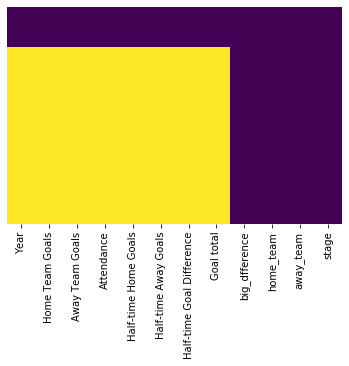

In [39]:
sns.heatmap(match.isnull(),yticklabels= False,cbar = False,cmap= 'viridis')

In [40]:
print(len(match))

4572


# 上网查的

In [41]:
match.dropna(subset = ["Attendance"], inplace=True)

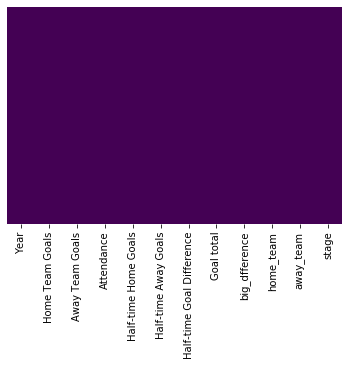

In [42]:
snstem.heatmap(match.isnull(),yticklabels= False,cbar = False,cmap= 'viridis')

In [43]:
print(len(match))

850


# EDA

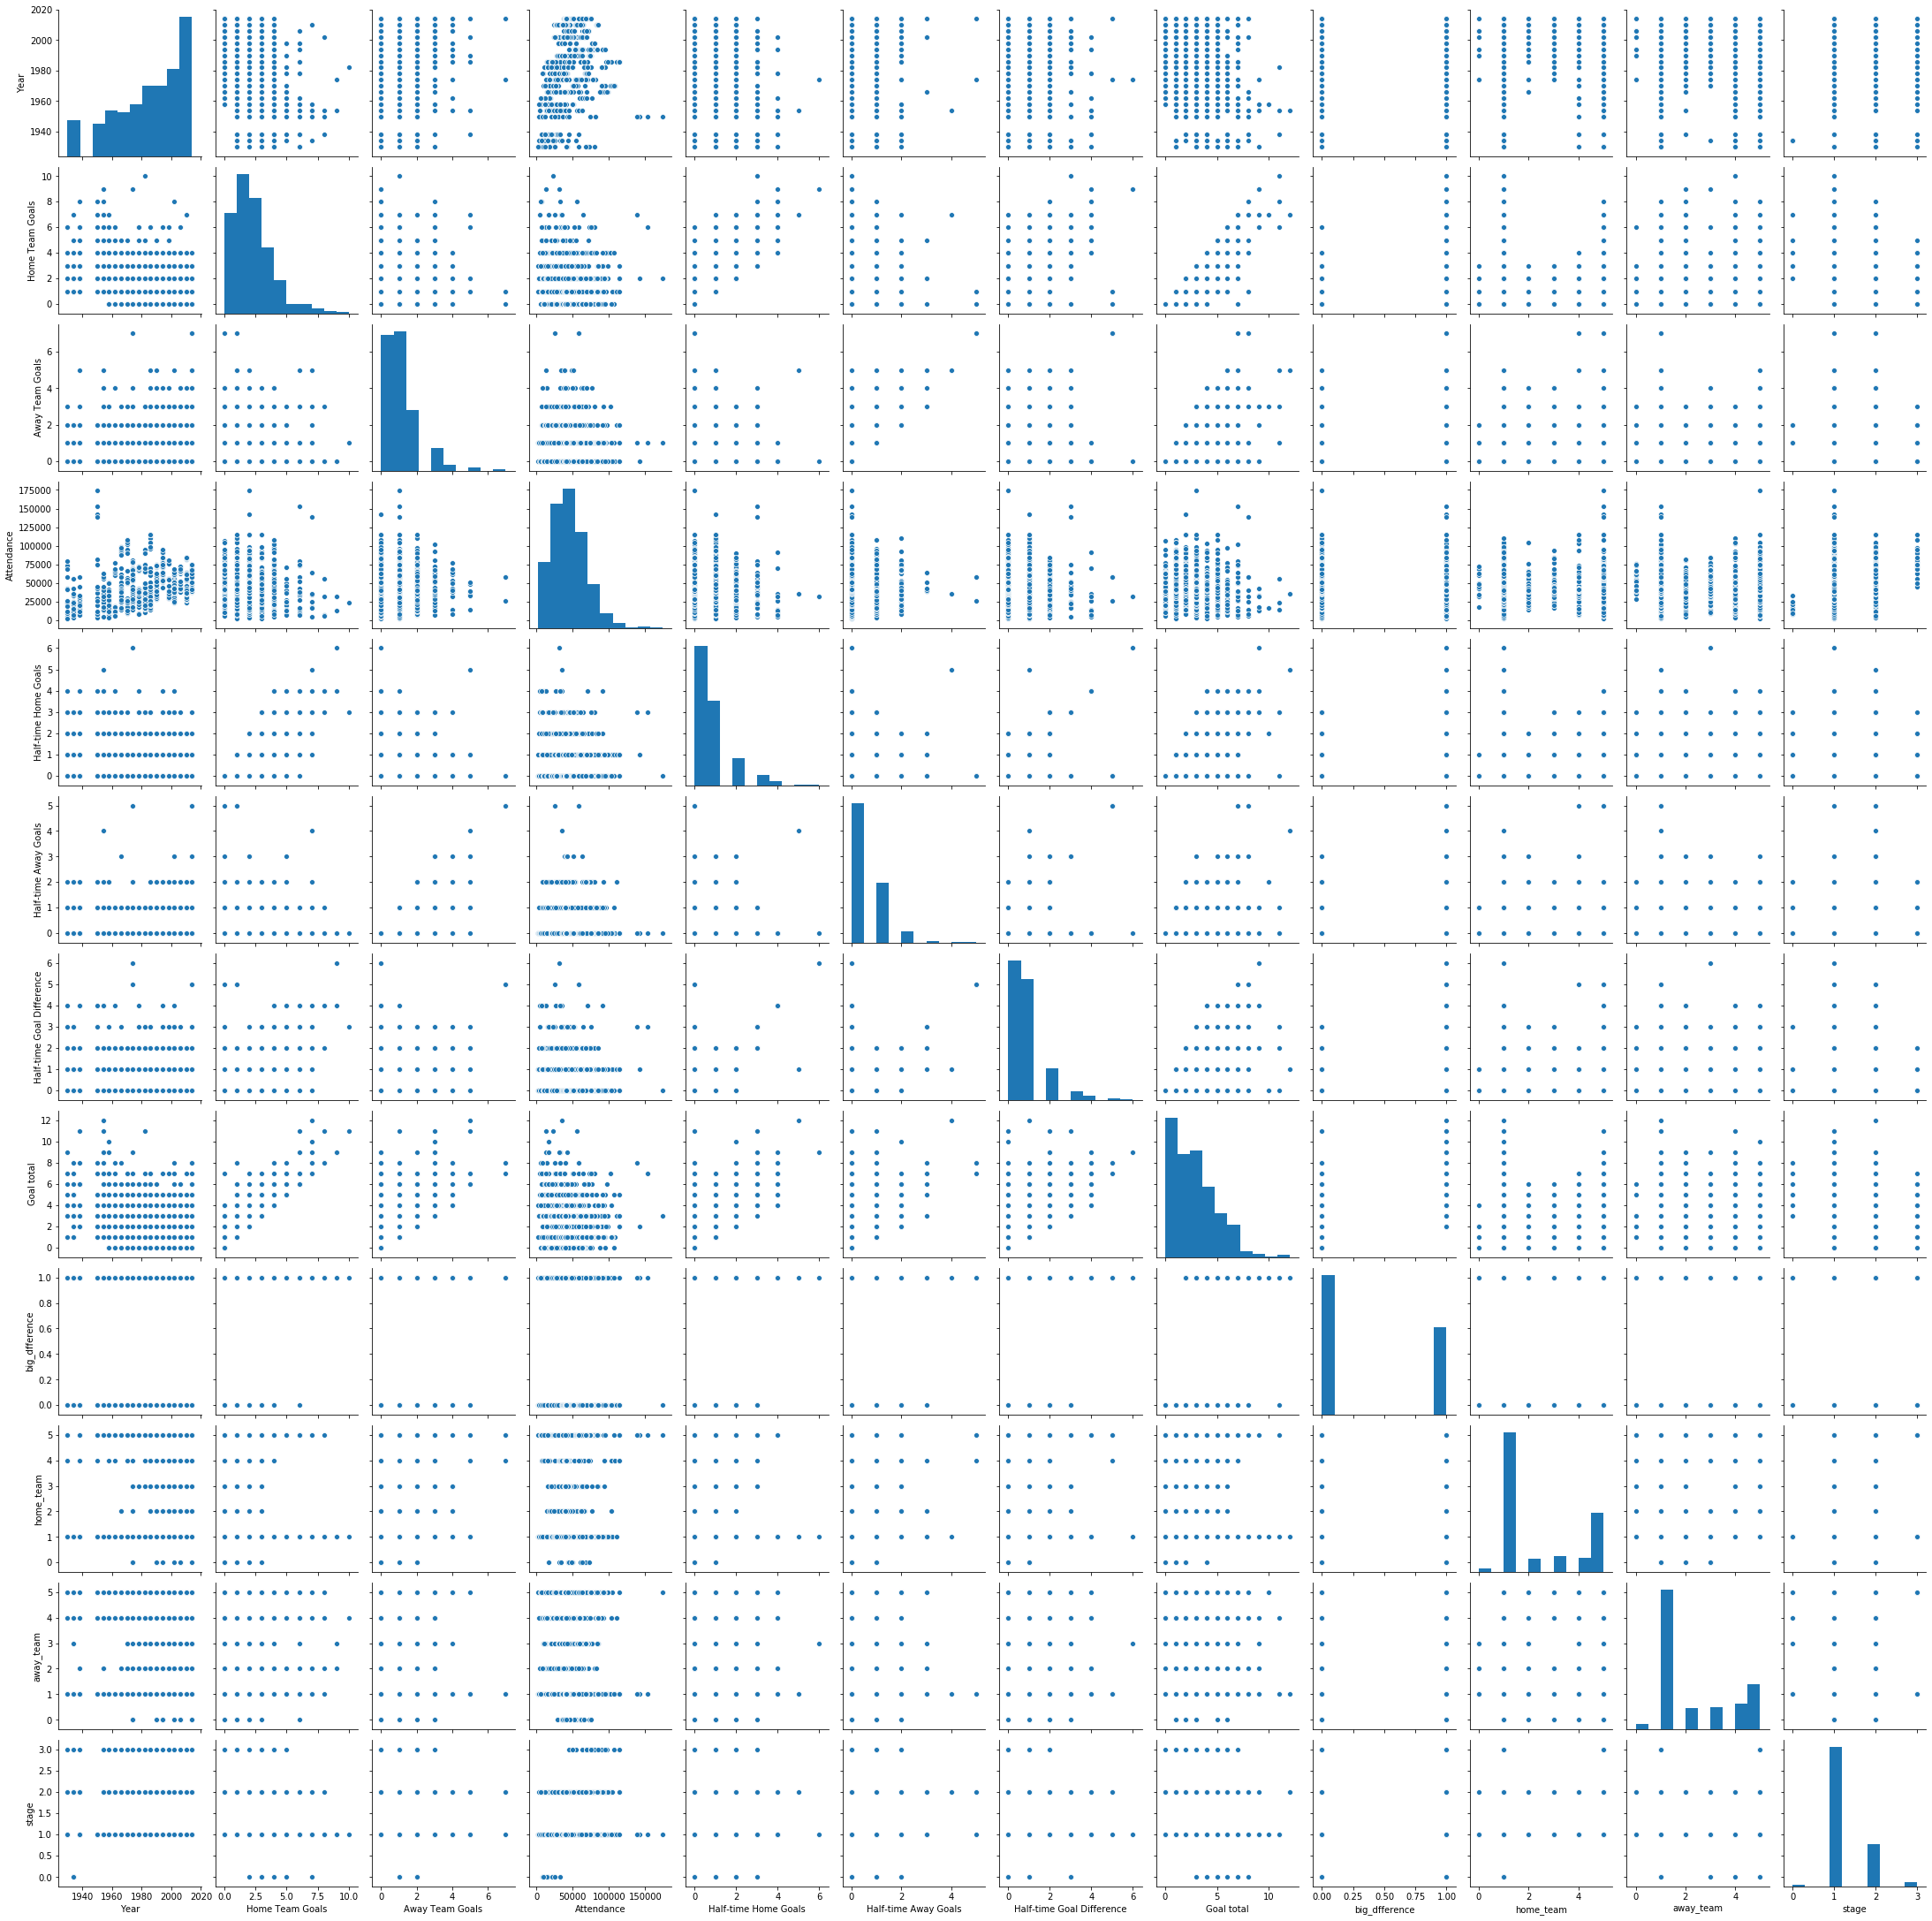

In [44]:
sns.set_style = 'whitegrid'
sns.pairplot(match)

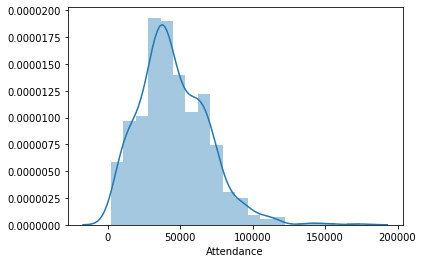

In [45]:
sns.distplot(match['Attendance'],bins = 20)

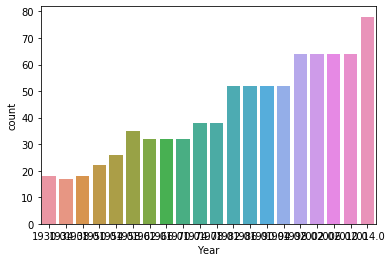

In [46]:
sns.countplot(match['Year'])

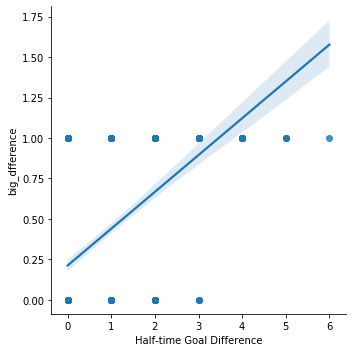

In [47]:
sns.lmplot(x ='Half-time Goal Difference', y = 'big_dfference',data = match)

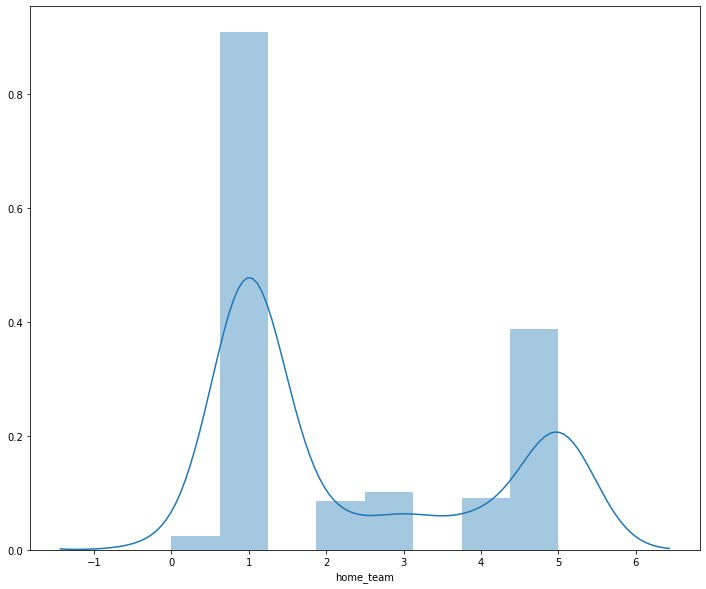

In [48]:
plt.figure(figsize=(12,10))
sns.distplot(match['home_team'])

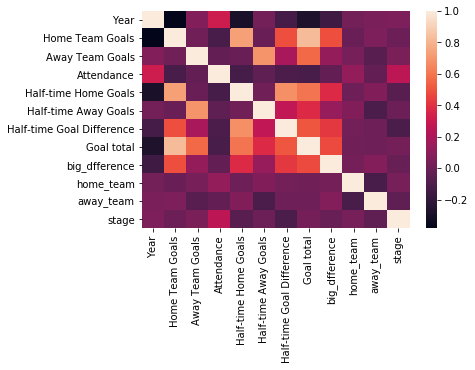

In [54]:
sns.heatmap(match.corr())

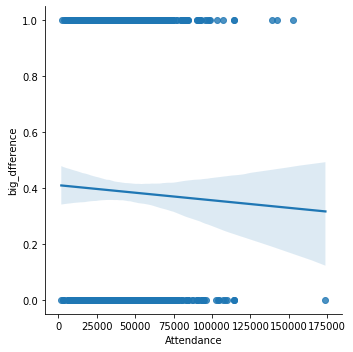

In [50]:
sns.lmplot(x = 'Attendance',y = 'big_dfference',data = match)

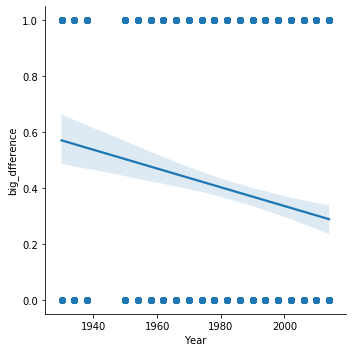

In [51]:
sns.lmplot(x = 'Year',y = 'big_dfference',data = match)

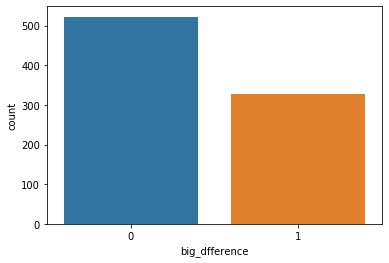

In [52]:
sns.countplot(match['big_dfference'])

# Linear Regression

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
match.columns

Index(['Year', 'Home Team Goals', 'Away Team Goals', 'Attendance',
       'Half-time Home Goals', 'Half-time Away Goals',
       'Half-time Goal Difference', 'Goal total', 'big_dfference', 'home_team',
       'away_team', 'stage'],
      dtype='object')

In [86]:
X=match.drop('big_dfference',axis = 1)
y=match['big_dfference']

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 101)

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lm = LinearRegression()

In [90]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
lm.coef_

array([-7.36547318e-04,  7.30105359e-02, -1.92645033e-02,  8.08267386e-07,
       -8.05644076e-02,  1.18939405e-02,  1.68122001e-01,  5.37460326e-02,
        4.66081391e-03,  2.99059265e-02,  2.35982628e-02])

In [92]:
pred = lm.predict(X_test)

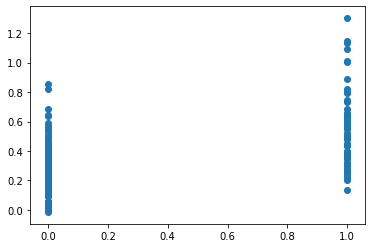

In [93]:
plt.scatter(y_test,pred)

In [94]:
coefficient = pd.DataFrame(lm.coef_,X.columns)
coefficient.columns = ['Coefficient']
coefficient

,Coefficient
Year,-7.365473e-04
Home Team Goals,7.301054e-02
Away Team Goals,-1.926450e-02
Attendance,8.082674e-07
Half-time Home Goals,-8.056441e-02
Half-time Away Goals,1.189394e-02
Half-time Goal Difference,1.681220e-01
Goal total,5.374603e-02
home_team,4.660814e-03
away_team,2.990593e-02


# Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
logmodel = LogisticRegression()

In [97]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
prediction = logmodel.predict(X_test)

In [99]:
from sklearn.metrics import classification_report,confusion_matrix

In [100]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       111
           1       0.71      0.61      0.65        59

    accuracy                           0.78       170
   macro avg       0.76      0.74      0.74       170
weighted avg       0.77      0.78      0.77       170



In [101]:
print(confusion_matrix(y_test,prediction))

[[96 15]
 [23 36]]


 # KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn_model = KNeighborsClassifier(n_neighbors = 1)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [105]:
scaler = StandardScaler()

In [106]:
scaler.fit(match.drop('big_dfference',axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [107]:
scaled_features = scaler.transform(match.drop('big_dfference',axis = 1))

In [108]:
match_feat = pd.DataFrame(scaled_features,columns = match.columns [:-1])
match_feat

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,Half-time Goal Difference,Goal total,big_dfference,home_team,away_team
0,-2.454319,1.358891,-0.020541,-1.734909,2.442473,-0.621125,2.461888,1.108205,-0.752376,1.100959,-0.515105
1,-2.454319,0.738226,-0.939479,-1.142615,1.375617,-0.621125,1.361096,0.085432,0.977614,-0.754590,-0.515105
2,-2.454319,0.117561,-0.020541,-0.899212,1.375617,-0.621125,1.361096,0.085432,-0.752376,1.719475,-0.515105
3,-2.454319,0.738226,-0.020541,-1.815646,0.308761,-0.621125,0.260305,0.596818,-0.752376,1.719475,-0.515105
4,-2.454319,-0.503103,-0.939479,-0.926906,-0.758096,-0.621125,-0.840487,-0.937341,1.554277,-0.754590,-0.515105
...,...,...,...,...,...,...,...,...,...,...,...
845,1.292653,-1.123768,-0.939479,0.256235,-0.758096,-0.621125,-0.840487,-1.448728,-0.752376,1.100959,1.448300
846,1.292653,-0.503103,5.493089,0.552851,-0.758096,6.611150,4.663471,2.642364,1.554277,-0.754590,1.448300
847,1.292653,-1.123768,-0.939479,0.771244,-0.758096,-0.621125,-0.840487,-1.448728,-0.752376,1.719475,1.448300
848,1.292653,-1.123768,1.817336,0.974342,-0.758096,2.271785,1.361096,0.085432,1.554277,-0.754590,1.448300


In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train,X_test,y_train,y_test = train_test_split(scaled_features,match['big_dfference'],test_size = 0.2,random_state = 101)

In [111]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [112]:
pred = knn_model.predict(X_test)

In [113]:
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
print(confusion_matrix(y_test,pred))

[[99 12]
 [ 9 50]]


In [115]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       111
           1       0.81      0.85      0.83        59

    accuracy                           0.88       170
   macro avg       0.86      0.87      0.87       170
weighted avg       0.88      0.88      0.88       170



In [116]:
error_rate = []
for i in range(1,40):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train,y_train)
    pred = knn_model.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

print(error_rate)

[0.12352941176470589, 0.17647058823529413, 0.1588235294117647, 0.1411764705882353, 0.1588235294117647, 0.17058823529411765, 0.21176470588235294, 0.18235294117647058, 0.20588235294117646, 0.19411764705882353, 0.2, 0.2, 0.19411764705882353, 0.20588235294117646, 0.2, 0.20588235294117646, 0.20588235294117646, 0.21176470588235294, 0.20588235294117646, 0.21176470588235294, 0.20588235294117646, 0.2, 0.2, 0.19411764705882353, 0.19411764705882353, 0.2, 0.18823529411764706, 0.19411764705882353, 0.19411764705882353, 0.2, 0.2, 0.20588235294117646, 0.20588235294117646, 0.20588235294117646, 0.19411764705882353, 0.19411764705882353, 0.18823529411764706, 0.19411764705882353, 0.19411764705882353]


Text(0, 0.5, 'Error Rate')

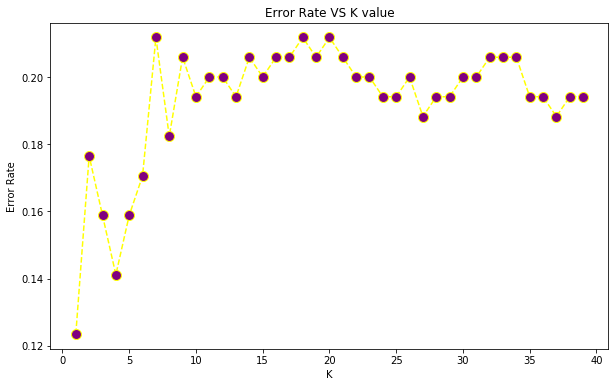

In [117]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color ='Yellow',linestyle = 'dashed',marker = 'o',markerfacecolor = 'Purple',markersize = 10)
plt.title('Error Rate VS K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [118]:
knn_model = KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(X_train,y_train)
pred = knn_model.predict(X_test)

print(confusion_matrix(y_test,pred))

[[108   3]
 [ 21  38]]


In [119]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       111
           1       0.93      0.64      0.76        59

    accuracy                           0.86       170
   macro avg       0.88      0.81      0.83       170
weighted avg       0.87      0.86      0.85       170



# Linear Regression

In [120]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
lm.coef_

array([-0.01651199,  0.12585467, -0.01541071,  0.01897119, -0.0755157 ,
        0.00822282,  0.15272828,  0.09511988,  0.00808239,  0.04835108,
        0.01201905])

In [122]:
pred = lm.predict(X_test)

In [123]:
pred = knn_model.predict(X_test)

In [124]:
coefficient = pd.DataFrame(lm.coef_,X.columns)
coefficient.columns = ['Coefficient']
coefficient

,Coefficient
Year,-0.016512
Home Team Goals,0.125855
Away Team Goals,-0.015411
Attendance,0.018971
Half-time Home Goals,-0.075516
Half-time Away Goals,0.008223
Half-time Goal Difference,0.152728
Goal total,0.095120
home_team,0.008082
away_team,0.048351


# decision tree

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
dtree = DecisionTreeClassifier()

In [127]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [128]:
pred = dtree.predict(X_test)
print(pred)
print(y_test)

[0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1
 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0
 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0]
605    0
689    0
679    1
174    0
747    0
      ..
468    1
517    0
448    0
746    0
374    0
Name: big_dfference, Length: 170, dtype: int64


In [129]:
from sklearn.metrics import classification_report,confusion_matrix

In [130]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        59

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



In [131]:
print(confusion_matrix(y_test,pred))

[[111   0]
 [  0  59]]


In [132]:
dtree.feature_importances_

array([0.        , 0.5256134 , 0.4152576 , 0.00590454, 0.        ,
       0.        , 0.        , 0.04912408, 0.        , 0.        ,
       0.00410037])

# SVC

In [103]:
from sklearn.svm import SVC

In [104]:
model = SVC()

In [105]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [106]:
pred = model.predict(X_test)

In [107]:
from sklearn.metrics import classification_report,confusion_matrix

In [108]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       111
           1       0.92      0.80      0.85        59

    accuracy                           0.91       170
   macro avg       0.91      0.88      0.89       170
weighted avg       0.91      0.91      0.90       170



In [109]:
print(confusion_matrix(y_test,pred))

[[107   4]
 [ 12  47]]


In [110]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.01,0.001]}

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
grid = GridSearchCV(SVC(),param_grid,refit = True,verbose  = 3)

In [113]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.868, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.831, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.809, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.816, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.794, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.875, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.721, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.699, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.772, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.713, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.684, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.875, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.882, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .

[CV] ................. C=1000, gamma=0.001, score=0.868, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.809, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.779, total=   0.0s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [114]:
grid.best_params_

{'C': 1000, 'gamma': 0.01}

In [115]:
grid.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [116]:
grid_pred = grid.predict(X_test)

In [117]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       111
           1       0.98      1.00      0.99        59

    accuracy                           0.99       170
   macro avg       0.99      1.00      0.99       170
weighted avg       0.99      0.99      0.99       170



In [118]:
print(confusion_matrix(y_test,grid_pred))

[[110   1]
 [  0  59]]
